<a href="https://colab.research.google.com/github/Patrikovik/DH/blob/master/Covid_Regress%C3%A3o_VS_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 

dados_covid = pd.read_csv('https://gist.githubusercontent.com/Patrikovik/bcea8148ab0a2d8ec9dfe2086911e950/raw/4beeee978f49e6f1e8ea7ac92e6d057e8787a710/report.csv')
X = dados_covid['CASOS']
y = dados_covid['OBITOS']

In [12]:
X.describe()

count     4190.000000
mean       132.549642
std       1316.477775
min          1.000000
25%          3.000000
50%         11.000000
75%         46.000000
max      64443.000000
Name: CASOS, dtype: float64

In [13]:
y.describe()

count    4190.000000
mean        7.446062
std       104.735030
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      4443.000000
Name: OBITOS, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
np.random.seed(43267)

X_treino,X_teste, y_treino , y_teste = train_test_split(X,y)

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X_treino_np = np.array(X_treino).reshape(-1, 1)
y_treino_np = np.array(y_treino).reshape(-1, 1)
y_teste_np = np.array(y_teste).reshape(-1,1)
X_teste_np = np.array(X_teste).reshape(-1,1)
reg.fit(X_treino_np,y_treino_np)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predict = reg.predict(X_teste_np)

In [17]:
reg.predict([[526]])

array([[37.60243444]])

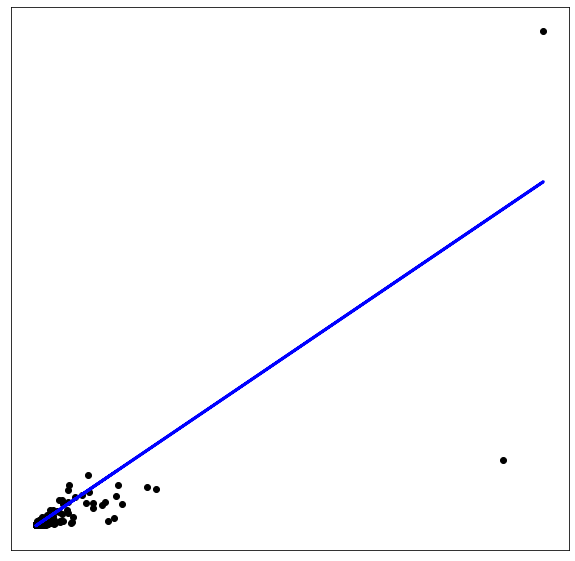

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X_teste_np, y_teste_np,  color='black')
plt.plot(X_teste_np, y_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [27]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_teste_np, y_predict_svr))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_teste_np, y_predict))

Mean squared error: 980.93
Coefficient of determination: 0.62


In [20]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(max_iter = 10000)
modelo.fit(X_treino_np,y_treino_np)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
y_predict_svr = modelo.predict(X_teste_np)

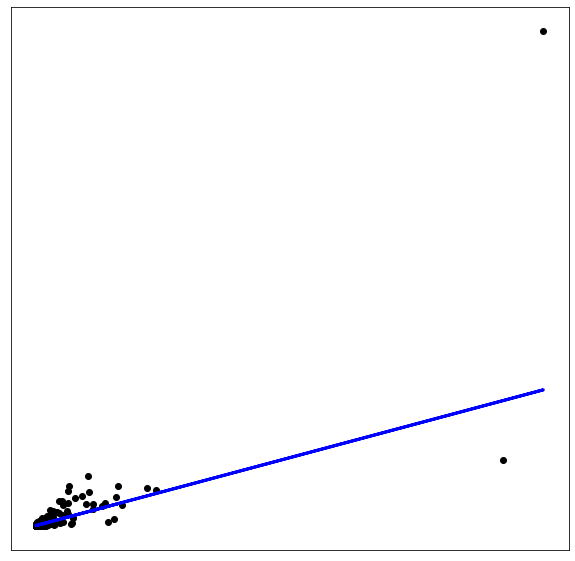

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(X_teste_np, y_teste_np,  color='black')
plt.plot(X_teste_np, y_predict_svr, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [23]:
### MÉTRICAS DO MODELO DE SVR
print('Mean squared error: %.2f'
      % mean_squared_error(y_teste_np, y_predict_svr))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_teste_np, y_predict_svr))

Mean squared error: 980.93
Coefficient of determination: 0.48


In [24]:
## Modelo de Regressão:
reg.predict([[600]])


array([[43.26925799]])

In [25]:
modelo.predict([[523]])

array([15.69398458])